# Train Neural Network to Predict chess ratings

In [25]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


Loading data from the file

In [2]:
def get_data(file_name):
    data = pd.read_csv(file_name)
    return data

In [3]:
data = get_data('data_new.csv')


In [4]:
ratings = list(data[' rating'])
age = list(data[' Age'])
name = data[' name']
# print name



In [5]:
import ast
try:
    rating_list = [ast.literal_eval(i) for i in ratings]
    age_list = [ast.literal_eval(i) for i in age]
except ValueError:
    print i

    
print rating_list[0]
print age_list[0]

[2107, 2107, 2107, 2109, 2109, 2109, 2111, 2111, 2111, 2102, 2104, 2086, 2106, 2110, 2110, 2110, 2110, 2110, 2110, 2112, 2123, 2113, 2104, 2094, 2094, 2094, 2094, 2094, 2094, 2098, 2098, 2102, 2110, 2110, 2102, 2105, 2105, 2105, 2105, 2105, 2105, 2105, 2095, 2098, 2098, 2107, 2097, 2104, 2104, 2104, 2092, 2089, 2075]
[589, 590, 591, 593, 594, 595, 597, 598, 599, 600, 601, 602, 603, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 621, 622, 623, 624, 625, 626, 627, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 641, 642, 643, 644, 645, 646, 647]


Normalize data

In [26]:
rating_list = np.array(rating_list)
age_list = np.array(age_list)
max_v = float(np.max(np.max(rating_list)))
max_a = float(np.max(np.max(age_list)))
print max_v
print max_a

2882.0
21769.0


In [27]:
# fix random seed for reproducibility
np.random.seed(7)

In [28]:
rating_list.shape

(284049,)

In [10]:
train_size = int(rating_list.shape[0] * 0.9)
val_size = int(rating_list.shape[0] * 0.05)
test_size = int(rating_list.shape[0] * 0.05)
print 'train_size= ',train_size,'\n','val_size= ',val_size,'\n','test_size= ',test_size

train_size=  255644 
val_size=  14202 
test_size=  14202


In [94]:
x_train = np.array([rating_list[:train_size],age_list[:train_size]])
x_val = np.array([rating_list[train_size:train_size+val_size],age_list[train_size:train_size+val_size]])
x_test = np.array([rating_list[-test_size:],age_list[-test_size:]])
print x_val.shape
print (x_train[1][:10])

(2, 14202)
[ list([589, 590, 591, 593, 594, 595, 597, 598, 599, 600, 601, 602, 603, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 621, 622, 623, 624, 625, 626, 627, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 641, 642, 643, 644, 645, 646, 647])
 list([889, 890, 891, 892, 893, 894, 895, 897, 898, 899, 900, 901, 902, 903, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 941, 942, 943, 944, 945, 946, 947])
 list([428, 429, 430, 431, 432, 433, 434, 435, 437, 438, 439, 440, 441, 442, 443])
 list([131, 132, 133, 134, 135, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 149, 150, 151, 152, 153, 154, 155])
 list([555, 556, 557, 558, 559, 561, 562, 563, 564, 565, 566, 567, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601,

In [52]:
batch_size = 1

model = Sequential()
layer1 = model.add(LSTM(3,return_sequences=False, batch_input_shape=(batch_size,1,2), activation=None, stateful= True))
layer4 = model.add(Dense(1))

adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss='mse',optimizer = adam,metrics=['accuracy'])
#model.fit(x_train, y_train_norm, epochs= 10, batch_size =batch_size, verbose = 2, shuffle=False, validation_data=(x_val,y_val_norm))


In [ ]:
print('Train...')
size =x_train.shape[1]
for epoch in range(10):

    mean_tr_acc = []
    mean_tr_loss = []
    for i in range(size):
        if i%10000==0:
            print i
#         print len(x_train[0][i])-1
        for j in range(len(x_train[0][i])-1):
            x_true = np.array([x_train[0][i][j]/max_v,x_train[1][i][j]/max_a])
            x_true = np.reshape(x_true,(1,1,2))
            y_true = np.array([x_train[0][i][j+1]/max_v])
#             print x_true,y_true
            tr_loss, tr_acc = model.train_on_batch(x_true,y_true)
            mean_tr_acc.append(tr_acc)
            mean_tr_loss.append(tr_loss)
        model.reset_states()
        
        #if i % 1000 == 0:
            #print epoch, i, np.mean(mean_tr_loss)
    
    print epoch, np.mean(mean_tr_loss)


    print('accuracy training = {}'.format(np.mean(mean_tr_acc)))
    print('loss training = {}'.format(np.mean(mean_tr_loss)))
    print('___________________________________')



Train...
0
10000
20000
30000
40000
50000
60000
70000
80000
210000
220000
230000
240000
250000


In [112]:
y_pred_list = []
y_train = []
size =5000
for i in range(size):
#     print i,
    temp = []
    temp2 =[]
    for j in range(len(x_train[0][i])-1):
        x_true = np.array([x_train[0][i][j]/max_v,x_train[1][i][j]/max_a])
        x_true = np.reshape(x_true,(1,1,2))
        y_true = np.array([x_train[0][i][j+1]/max_v])
        y_pred = model.predict_on_batch(x_true)

        
        temp.append(y_pred[0][0]*max_v)
        temp2.append(y_true[0]*max_v)
#     print temp
    y_pred_list.append(temp)
    y_train.append(temp2)
#     model.reset_states()



In [113]:
print np.array(y_pred_list).shape

(5000,)


In [114]:
print y_pred_list[0], y_train[0]

[2121.3435394763947, 2111.8323919773102, 2108.2859817743301, 2110.9009976387024, 2110.7982728481293, 2110.769757270813, 2112.9798862934113, 2112.850879073143, 2112.8319832086563, 2102.9972010850906, 2105.7951632738113, 2086.1012061834335, 2109.1067494153976, 2112.4501149654388, 2111.8703554868698, 2111.8698401451111, 2111.8880488872528, 2111.8947483301163, 2111.9021348953247, 2114.0985214710236, 2126.0106462240219, 2114.3120447397232, 2104.9914019107819, 2094.8137457370758, 2095.5943167209625, 2095.7167962789536, 2095.6985875368118, 2095.7051151990891, 2095.7226368188858, 2100.0992625951767, 2099.8414199352264, 2104.1694318056107, 2112.6761782169342, 2112.1024310588837, 2103.2423319816589, 2107.1032724380493, 2107.0156643390656, 2106.9624123573303, 2106.9764983654022, 2106.9840567111969, 2106.9910997152328, 2106.998314499855, 2096.0428358316422, 2100.0101084709167, 2099.9561693668365, 2109.7521290779114, 2098.2186087369919, 2106.4403711557388, 2106.1426753997803, 2106.0284413099289, 20

In [115]:
y_predict = np.array(y_pred_list)
y_train = np.array(y_train)
error = 0
length = 0
for i in range(y_train.shape[0]):
    temp = np.zeros(len(y_train[i]))
    temp = abs(np.array(y_train[i])-np.array(y_predict[i]))/np.array(y_train[i])
    error += np.sum(temp)
    length += temp.shape[0] 
    
percentage_error = error/(length)

print (error)
print length 
print percentage_error

688.337142216
182643
0.00376875731463


0.00376875731463


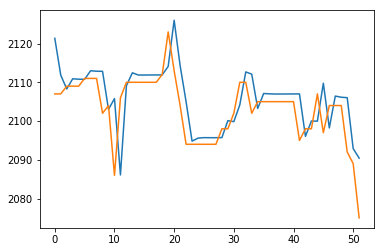

In [119]:
print percentage_error
# print y_predict
plt.plot(np.array(y_predict[0]))
plt.plot(np.array(y_train[0]))
plt.show()

In [117]:
print("Accuracy:",(1-percentage_error)*100)

('Accuracy:', 99.623124268536927)
